## Problem Statement
### The problem that I am trying to solve is whether the bluecars taken in month 5 are greater than the bluecars taken in month 1
### I am tasked with veryfing a hypothesis from the autolib car sharing service about their electric blue cars from the above problem.
### This hypothesis would help the company know whether demand for the bluecars is increasing and thus act in informing a decision on whether to increase the bluecar fleet.

### H0:There is no difference in blucar usage between month 1 and month 5
### H1:There is a clear increase in bluecar usage in month 5 as compared to month 1

#### step one: Previewing and cleaning the data

In [95]:
#importing relevant libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling
from scipy import stats

In [96]:
#importing the dataset
df = pd.read_csv('autolib_daily_events_postal_code.csv')
df

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


In [97]:
df.shape

(16085, 13)

#### The dataset has 16085 rows and 13 columns

#### checking the unique dates in the autolib dataframe

In [99]:
df.date.unique()

array(['1/1/2018', '1/2/2018', '1/3/2018', '1/4/2018', '1/5/2018',
       '1/6/2018', '1/7/2018', '1/8/2018', '1/9/2018', '1/10/2018',
       '1/11/2018', '1/12/2018', '1/13/2018', '1/14/2018', '1/15/2018',
       '1/16/2018', '1/17/2018', '1/18/2018', '1/19/2018', '1/20/2018',
       '1/21/2018', '1/22/2018', '1/23/2018', '1/24/2018', '1/25/2018',
       '1/26/2018', '1/27/2018', '1/28/2018', '1/29/2018', '1/30/2018',
       '1/31/2018', '2/1/2018', '2/2/2018', '2/3/2018', '2/4/2018',
       '2/5/2018', '2/6/2018', '2/7/2018', '2/8/2018', '2/9/2018',
       '2/10/2018', '2/11/2018', '2/12/2018', '2/13/2018', '2/14/2018',
       '2/15/2018', '2/16/2018', '2/17/2018', '2/18/2018', '2/19/2018',
       '2/20/2018', '2/21/2018', '2/22/2018', '2/23/2018', '2/24/2018',
       '2/28/2018', '3/1/2018', '3/2/2018', '3/3/2018', '3/4/2018',
       '3/5/2018', '3/6/2018', '3/7/2018', '3/8/2018', '3/9/2018',
       '3/10/2018', '3/11/2018', '3/12/2018', '3/13/2018', '3/14/2018',
       '3/15/2018',

#### From the above data I can tell that the data only runs until the sixth month of the year and that on data on the 6th month is incomplete

#### Inorder to select the specific months I will be working with I will need to access the datetime column but it is in string format.

#### I will first need to change it to the datetime format to access the 1st and 5th months and create 2 new datafames each month in a different dataframe, I will change it back to string format later as I will not be doing any operation on the dates during this analysis

#### note that I am only using the weekdays and not the weekends in the analysis

In [100]:
#converting the date column datatype to datetime 
df['date'] = pd.to_datetime(df['date'])

In [174]:
#creating month 1 dataframe 
january = df[(df.date >= '1/1/2018')& (df.date <= '1/31/2018') & (df.day_type == 'weekday')]
january.shape

(2369, 13)

In [173]:
#creating month 3 dataframe
may = df[(df.date >= '5/1/2018')& (df.date <= '5/31/2018') & (df.day_type == 'weekday')]
may.shape

(1558, 13)

In [176]:
#reconverting the date column datatype back to str
may.date = may.date.apply(str)

In [104]:
january.date = january.date.apply(str)

#### I will then remove any outliers that might affect the final calculation 

#### NB: I discovered that running the outlier algorithm a second or third time resulted in more outliers being removed improving on the overall quality of the data,thus I ran it 5 times for each dataframe to get a more coherent dataset

In [128]:
#removing outliers in january dataframe
q1 = january.quantile(0.25)
q3 = january.quantile(0.75)
IQR = q3-q1
january = january[~((january < (q1 - 1.5 * IQR)) |(january > (q3 + 1.5 * IQR))).any(axis=1)]
january.shape

(744, 13)

In [180]:
#removing outliers in march dataframe
q1 = may.quantile(0.25)
q3 = may.quantile(0.75)
IQR = q3-q1
may = may[~((may < (q1 - 1.5 * IQR)) | (may > (q3 + 1.5 * IQR))).any(axis=1)]
may.shape

(518, 13)

In [181]:
#checking for null values
may.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [134]:
january.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

# Exploratory Data Analysis

## Univariate analysis

#### checking the frequency of days in 'days of the week' column in march and january

In [183]:
may['dayOfWeek'].value_counts()

1    132
0    126
2     91
3     88
4     81
Name: dayOfWeek, dtype: int64

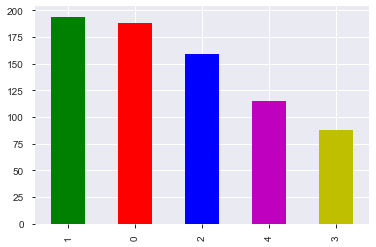

In [136]:
colors = ['g','r','b','m','y']
january.dayOfWeek.value_counts().plot.bar(color = colors)

#### The data on january is quite different than the one for march as most bluecars tend to be taken on Tuesday

#### checking the info of the january dataframe

In [137]:
january.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 3900 to 15959
Data columns (total 13 columns):
Postal code               744 non-null int64
date                      744 non-null object
n_daily_data_points       744 non-null int64
dayOfWeek                 744 non-null int64
day_type                  744 non-null object
BlueCars_taken_sum        744 non-null int64
BlueCars_returned_sum     744 non-null int64
Utilib_taken_sum          744 non-null int64
Utilib_returned_sum       744 non-null int64
Utilib_14_taken_sum       744 non-null int64
Utilib_14_returned_sum    744 non-null int64
Slots_freed_sum           744 non-null int64
Slots_taken_sum           744 non-null int64
dtypes: int64(11), object(2)
memory usage: 81.4+ KB


#### creating a boxplot of the bluecars column to check if most of the outliers were removed

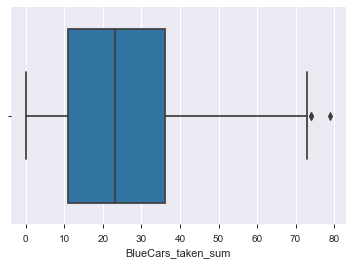

In [184]:
sns.boxplot(may['BlueCars_taken_sum'])

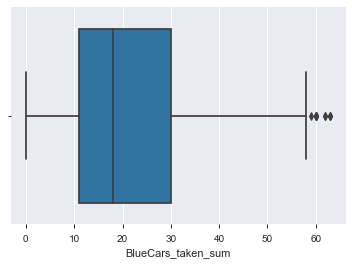

In [139]:
sns.boxplot(january['BlueCars_taken_sum'])

#### creating a histogram of the the bluecars taken column for both januray and march

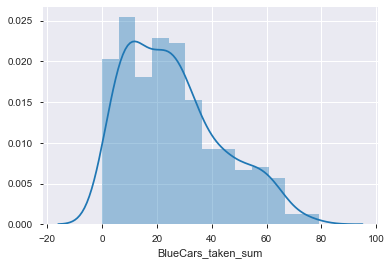

In [185]:
sns.distplot(may['BlueCars_taken_sum'])

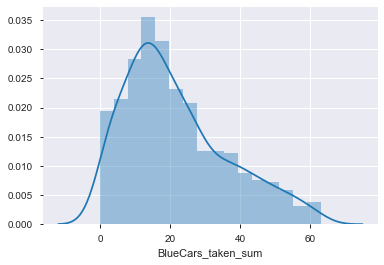

In [141]:
sns.distplot(january['BlueCars_taken_sum'])

#### As you can observe from the above histograms the column of interest (bluecar taken sum) has an irregular normal distribution

#### next I am going to create samples and use those samples in calculating the t-statistic and p-value

In [142]:
jansample = january.sample(n=30)
jansample.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
7642,92320,2018-01-02 00:00:00,1438,1,weekday,51,53,0,1,2,3,0,0
7177,92290,2018-01-05 00:00:00,1440,4,weekday,20,15,1,2,2,3,0,0
13288,94110,2018-01-11 00:00:00,1440,3,weekday,34,39,0,0,5,5,0,0
8108,92350,2018-01-09 00:00:00,1439,1,weekday,26,24,0,0,2,3,0,0
11662,93360,2018-01-16 00:00:00,1440,1,weekday,15,13,0,0,0,1,0,0


In [186]:
#creating a sample of 30 variables
maysample = may.sample(n= 30)
maysample.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
12625,93600,2018-05-21 00:00:00,1440,0,weekday,28,20,0,0,0,0,0,0
8223,92350,2018-05-07 00:00:00,1437,0,weekday,26,18,0,0,2,2,0,0
7296,92290,2018-05-07 00:00:00,1437,0,weekday,10,10,0,0,0,0,0,0
4341,91400,2018-05-25 00:00:00,1440,4,weekday,21,18,0,0,0,0,0,0
15284,94500,2018-05-30 00:00:00,1440,2,weekday,25,32,0,0,3,4,0,0


#### using the describe method in calculating the measures of central tendency 

In [144]:
jansample.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.0,30.0
mean,93347.333333,1439.233333,1.766667,21.800000,22.566667,0.533333,0.70000,1.566667,1.766667,0.0,0.0
std,1145.870948,0.858360,1.454679,12.906561,13.283859,0.681445,0.83666,1.501340,1.330889,0.0,0.0
min,91370.000000,1438.000000,0.000000,3.000000,4.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0
25%,92382.500000,1438.250000,1.000000,13.250000,13.250000,0.000000,0.00000,1.000000,1.000000,0.0,0.0
50%,93230.000000,1439.500000,1.000000,18.500000,22.000000,0.000000,0.00000,1.000000,1.500000,0.0,0.0
75%,94192.500000,1440.000000,3.000000,27.750000,27.750000,1.000000,1.00000,2.000000,3.000000,0.0,0.0
max,95880.000000,1440.000000,4.000000,60.000000,58.000000,2.000000,2.00000,5.000000,5.000000,0.0,0.0


In [187]:
maysample.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,30.000000,30.00000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.0,30.0
mean,93100.000000,1438.50000,2.000000,29.733333,29.30000,0.566667,0.600000,1.933333,1.900000,0.0,0.0
std,1003.002389,1.92533,1.531283,19.213740,19.27684,0.727932,0.855006,2.066704,2.040115,0.0,0.0
min,91400.000000,1435.00000,0.000000,4.000000,4.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,92297.500000,1437.00000,1.000000,17.500000,14.25000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,93265.000000,1440.00000,2.000000,26.500000,26.00000,0.000000,0.000000,1.000000,1.500000,0.0,0.0
75%,93750.000000,1440.00000,3.750000,38.000000,37.25000,1.000000,1.000000,3.000000,2.000000,0.0,0.0
max,95100.000000,1440.00000,4.000000,79.000000,75.00000,2.000000,2.000000,7.000000,7.000000,0.0,0.0


#### creating a histogram of the samples 

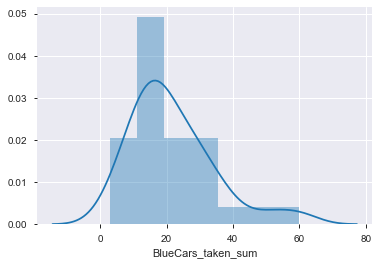

In [146]:
sns.distplot(jansample['BlueCars_taken_sum'])

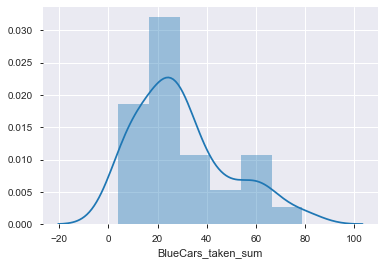

In [188]:
sns.distplot(maysample['BlueCars_taken_sum'])

## Bivariate analysis

#### creating a scatterplot of the blucars taken against the postal code from the sampled dataframes 

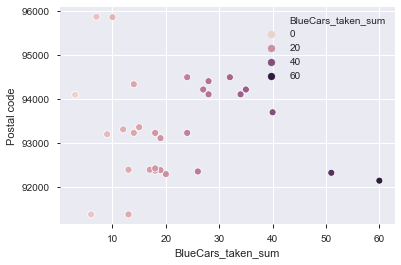

In [148]:
x = jansample.BlueCars_taken_sum
y = jansample['Postal code']
sns.scatterplot(x,y,hue = x)

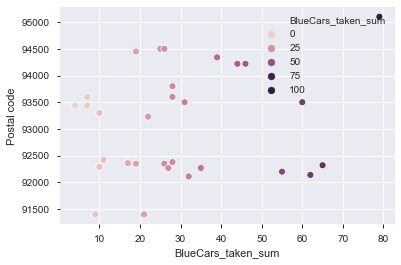

In [189]:
r = maysample.BlueCars_taken_sum
v = maysample['Postal code']
sns.scatterplot(r,v,hue = r)

## Hypothesis testing

#### To conduct the test I will use a t-test
#### The reason for using a t-test are due to the fact of the small sample size that I have selected (<30 samples)
#### The level of significance is set at 0.05,this will be a two sided t-test

#### To run the hypothesis test I will the 'bluecar_taken_sum' column as which should give a clear picture on bluecar usage during the chosen periods

In [192]:
print(jansample.BlueCars_taken_sum .mean())
print(maysample.BlueCars_taken_sum .mean())

21.8
29.733333333333334


#### finding the means of the blucar column between Januray and May I can see that the mean for May has increased substantially as compared to the mean for january but does that mean{ pun unintended:) } that more people are using the bluecars?
#### Time to find out below

In [193]:
from scipy.stats import ttest_ind as t_test
x = jansample.BlueCars_taken_sum
y = maysample.BlueCars_taken_sum

t,p = t_test(x,y, equal_var= True)

print('the t-statistic is ' + str(t) + ' whilst the p value is ' + str(p))

the t-statistic is -1.877311776595369 whilst the p value is 0.0655073917984725


#### The above pvalue of 6.5% is greater than the level of signifance of 5% and thus indicates a clear rejection of the alternative hypothesis that bluecar usage has increased over the 4 month period between January and May.
#### A conclusion to be drawn from this would be to look at the factors that are causing bluecar usage to not increase and to formulate solutions on how this can be countered.